In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
from dateutil.relativedelta import relativedelta

## Select any stock

In [2]:
stock = yf.download('TLT', '2021-01-01')

[*********************100%%**********************]  1 of 1 completed


## In this case we are using iShares 20+ Year Treasury Bond ETF (TLT)

<Axes: xlabel='Date'>

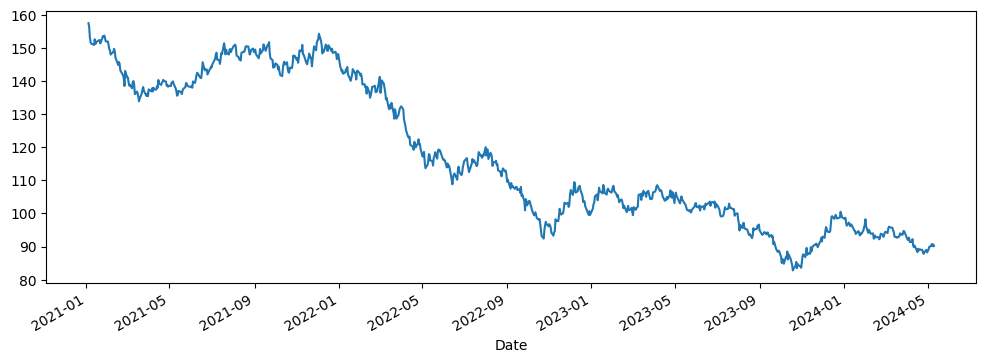

In [3]:
stock['Close'].plot(figsize=(12,4))

In [4]:
day = np.arange(1, len(stock)+1)
stock['day'] = day

In [5]:
stock['20_day_MA'] = stock['Close'].rolling(20).mean().shift()
stock['50_day_MA'] = stock['Close'].rolling(50).mean().shift()
stock['100_day_MA'] = stock['Close'].rolling(100).mean().shift()
stock['200_day_MA'] = stock['Close'].rolling(200).mean().shift()

In [6]:
stock['signal_50'] = np.where(stock['20_day_MA'] > stock['50_day_MA'], 1, 0)
stock['signal_50'] = np.where(stock['20_day_MA'] < stock['50_day_MA'], -1, stock['signal_50'])

stock['signal_100'] = np.where(stock['20_day_MA'] > stock['100_day_MA'], 1, 0)
stock['signal_100'] = np.where(stock['20_day_MA'] < stock['100_day_MA'], -1, stock['signal_100'])

stock['signal_200'] = np.where(stock['20_day_MA'] > stock['200_day_MA'], 1, 0)
stock['signal_200'] = np.where(stock['20_day_MA'] < stock['200_day_MA'], -1, stock['signal_200'])

In [7]:
stock.dropna(inplace=True)

In [8]:
stock['return'] = np.log(stock['Close']).diff()

stock['system_return_50'] = stock['signal_50'] * stock['return']
stock['system_return_100'] = stock['signal_100'] * stock['return']
stock['system_return_200'] = stock['signal_200'] * stock['return']

stock['entry_50'] = stock['signal_50'].diff()
stock['entry_100'] = stock['signal_100'].diff()
stock['entry_200'] = stock['signal_200'].diff()

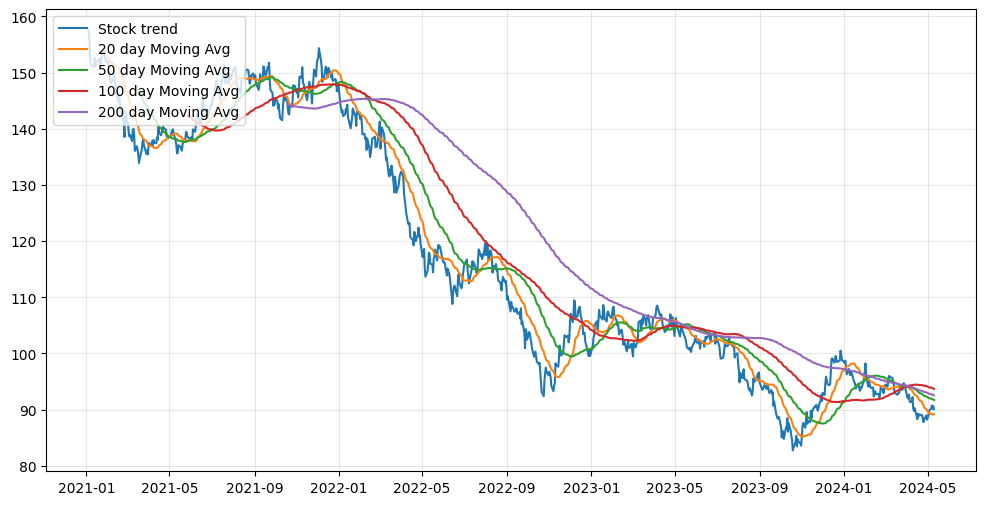

In [225]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha=0.3)

plt.plot(stock['Close'], label = 'Stock trend')
plt.plot(stock['20_day_MA'], label = '20 day Moving Avg')
plt.plot(stock['50_day_MA'], label = '50 day Moving Avg')
plt.plot(stock['100_day_MA'], label = '100 day Moving Avg')
plt.plot(stock['200_day_MA'], label = '200 day Moving Avg')

plt.legend(loc=2)
plt.show()

### 50 MA

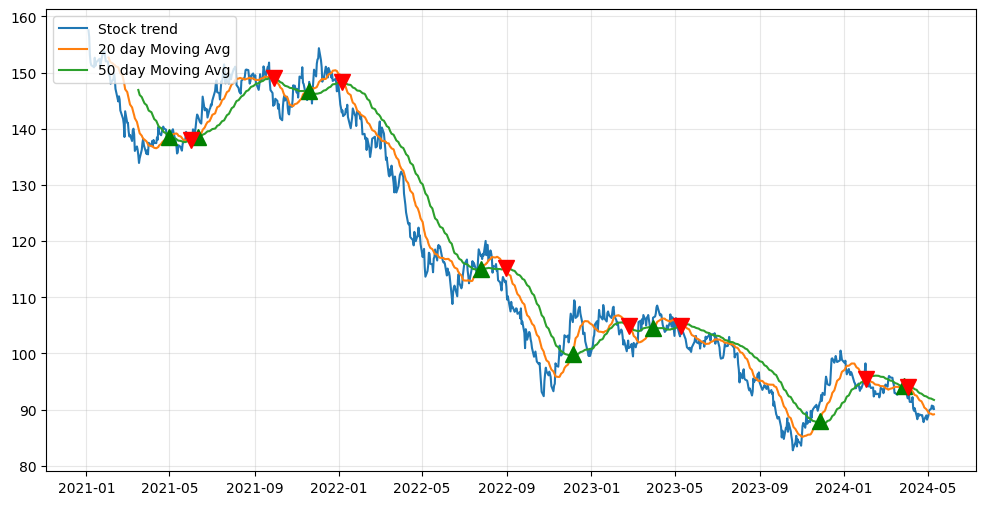

In [226]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha=0.3)

plt.plot(stock['Close'], label = 'Stock trend')
plt.plot(stock['20_day_MA'], label = '20 day Moving Avg')
plt.plot(stock['50_day_MA'], label = '50 day Moving Avg')

plt.plot(stock.loc[stock['entry_50'] == 2].index, stock['20_day_MA'][stock['entry_50'] == 2], '^', color='g', markersize=12)
plt.plot(stock.loc[stock['entry_50'] == -2].index, stock['50_day_MA'][stock['entry_50'] == -2], 'v', color='r', markersize=12)

plt.legend(loc=2)
plt.show()

### 100 MA

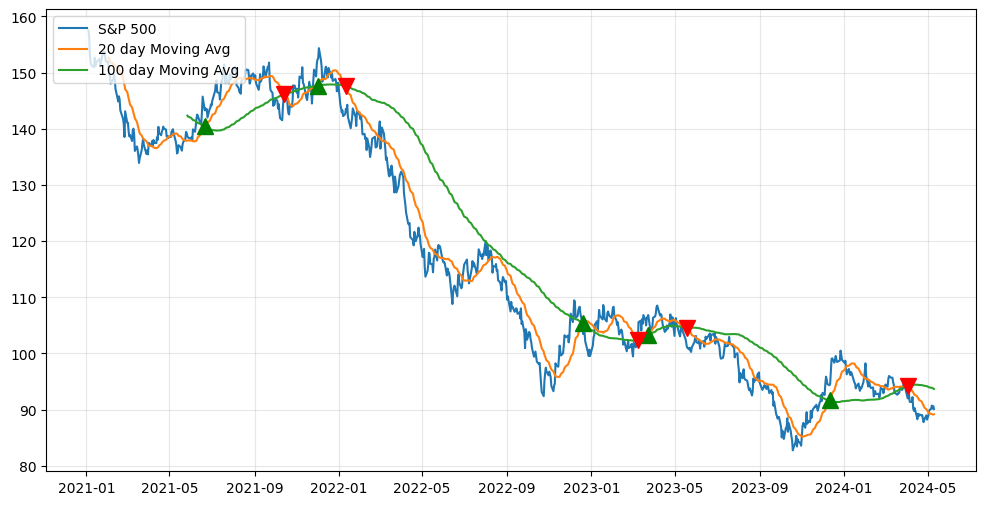

In [227]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha=0.3)

plt.plot(stock['Close'], label = 'S&P 500')
plt.plot(stock['20_day_MA'], label = '20 day Moving Avg')
plt.plot(stock['100_day_MA'], label = '100 day Moving Avg')

plt.plot(stock.loc[stock['entry_100'] == 2].index, stock['20_day_MA'][stock['entry_100'] == 2], '^', color='g', markersize=12)
plt.plot(stock.loc[stock['entry_100'] == -2].index, stock['100_day_MA'][stock['entry_100'] == -2], 'v', color='r', markersize=12)

plt.legend(loc=2)
plt.show()

### 200 MA

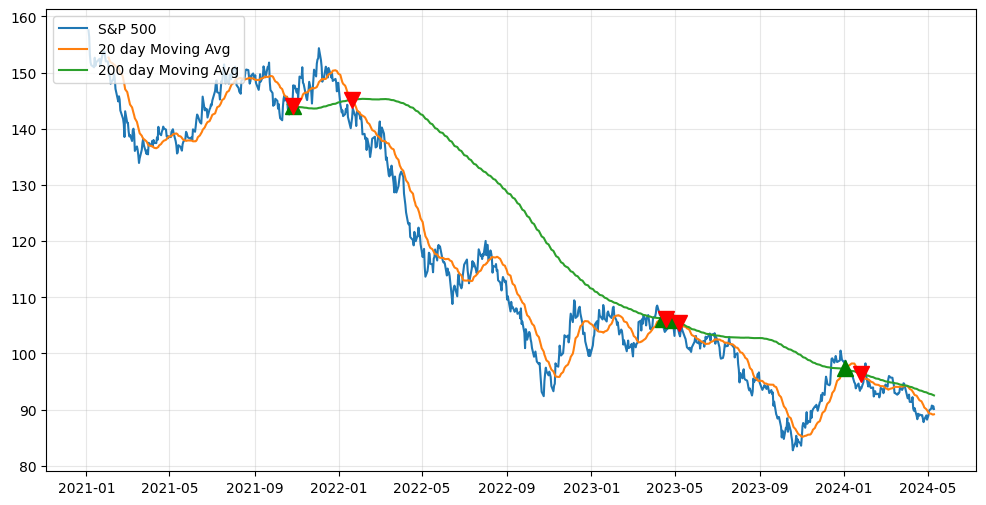

In [228]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha=0.3)

plt.plot(stock['Close'], label = 'S&P 500')
plt.plot(stock['20_day_MA'], label = '20 day Moving Avg')
plt.plot(stock['200_day_MA'], label = '200 day Moving Avg')

plt.plot(stock.loc[stock['entry_200'] == 2].index, stock['20_day_MA'][stock['entry_200'] == 2], '^', color='g', markersize=12)
plt.plot(stock.loc[stock['entry_200'] == -2].index, stock['200_day_MA'][stock['entry_200'] == -2], 'v', color='r', markersize=12)

plt.legend(loc=2)
plt.show()

### Returns

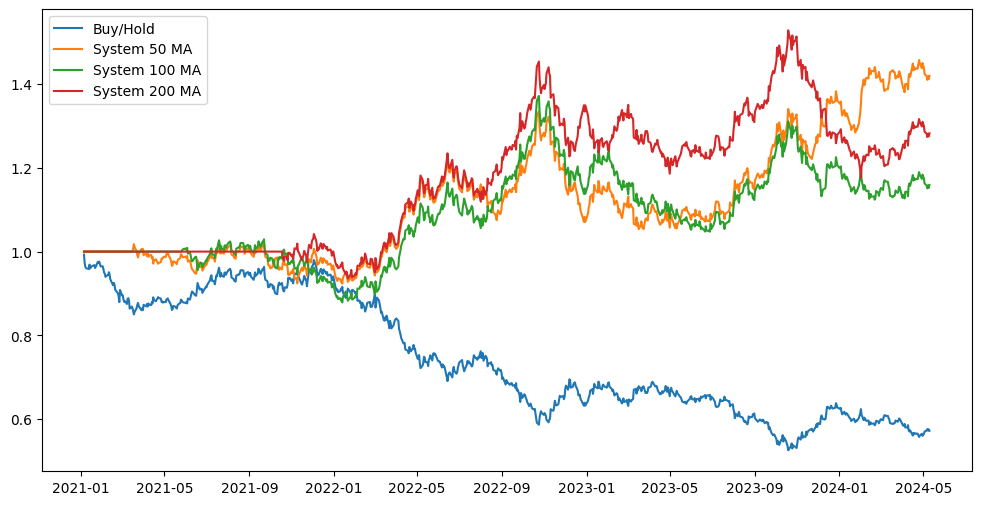

In [229]:
plt.plot(np.exp(stock['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(stock['system_return_50']).cumprod(), label='System 50 MA')
plt.plot(np.exp(stock['system_return_100']).cumprod(), label='System 100 MA')
plt.plot(np.exp(stock['system_return_200']).cumprod(), label='System 200 MA')

plt.legend()
plt.show()

In [230]:
print('- Buy/Hold Return = ' +str((np.exp(stock['return']).cumprod()[-1]-1) * 100))
print('- System 50 MA Return = ' +str((np.exp(stock['system_return_50']).cumprod()[-1]-1) * 100))
print('- System 100 MA Return = ' +str((np.exp(stock['system_return_100']).cumprod()[-1]-1) * 100))
print('- System 200 MA Return = ' +str((np.exp(stock['system_return_200']).cumprod()[-1]-1) * 100))

- Buy/Hold Return = -42.795476331587004
- System 50 MA Return = 41.98434355377798
- System 100 MA Return = 15.890793696084682
- System 200 MA Return = 28.248871996112037


In [231]:
years = (stock.index.max() - stock.index.min()).days / 365

In [232]:
print('YEARLY:')
print('- Buy/Hold Return = ' +str(((np.exp(stock['return']).cumprod()[-1]-1) * 100) / years))
print('- System 50 MA Return = ' +str(((np.exp(stock['system_return_50']).cumprod()[-1]-1) * 100) / years))
print('- System 100 MA Return = ' +str(((np.exp(stock['system_return_100']).cumprod()[-1]-1) * 100) / years))
print('- System 200 MA Return = ' +str(((np.exp(stock['system_return_200']).cumprod()[-1]-1) * 100) / years))

YEARLY:
- Buy/Hold Return = -12.782609542577134
- System 50 MA Return = 12.54033174887804
- System 100 MA Return = 4.746431832300253
- System 200 MA Return = 8.437674532390258


## System 50 MA Return has the highest Yearly returns